## 환경설정

In [ ]:
project_name = "영화리뷰 감정 분석" # 프로젝트 이름
class_info = "2차수 A반" # 차수 정보
email = "dl2a@sk.com" # 회사 이메일(본인의 회사 이메일 입력)

## 모듈 설치 및 데이터 다운로드

In [ ]:
!pip install --upgrade mySUNI -q

import mySUNI
from mySUNI import cds, utils
import urllib.request
import zipfile


project = cds.Project(project_name, class_info, email)
project.edu_name = 'SUNI_딥러닝'

# 이메일 설정 확인
if not project.email:
    raise print("[이메일이 누락되었습니다] 이메일을 설정해 주세요↑↑↑")


print('===' * 15)
print(f'패키지버전: {mySUNI.__version__}')
print('===' * 15)
print(f'프로젝트명: {project_name}\n차수 정보 : {class_info}\n이  메  일: {email}')
print('===' * 15)

# 데이터셋 다운로드
cds.download_project(project_name, class_info, email)

  0%|          | 0.00/993k [00:00<?, ?B/s]

test.csv 

  0%|          | 0.00/963k [00:00<?, ?B/s]

submission.csv 

  0%|          | 0.00/68.9k [00:00<?, ?B/s]


프로젝트: 영화리뷰 감정 분석
파일 목록

submission.csv
- data/영화리뷰 감정 분석/submission.csv

train.csv
- data/영화리뷰 감정 분석/train.csv

test.csv
- data/영화리뷰 감정 분석/test.csv



## 필요한 모듈 import 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import tensorflow as tf

pd.set_option('display.max_colwidth', None)

# Data 경로 설정
DATA_DIR = 'data'

# 경고 무시
warnings.filterwarnings('ignore')

SEED=123

np.random.seed(SEED)
tf.random.set_seed(SEED)

## 데이터 로드

### 1. 데이터셋 로드

In [ ]:
# train 데이터셋 로드 (train.csv)
train = pd.read_csv(os.path.join(DATA_DIR, project_name, 'train.csv'))
                                 
# test 데이터셋 로드 (test.csv)
test = pd.read_csv(os.path.join(DATA_DIR, project_name, 'test.csv'))

In [ ]:
train.head()

,document,label
0,코미디 영화 네요 보면서 많이 웃었어요,1
1,역시 일본인들의 일상현실생활이군 개막장국가답다,1
2,완전 잼없고 내용도 없음. 보지마삼,0
3,왠만해선 좋게 봐주려고 했는데 내 와이파이가 이딴 쓰레기 영화를 보기 위해 한 몸 다 받쳐 다운로드를 했다는 것에 도저히 참을 수가 없다. 스토리도 작화도 연출도 이도저도 아닌 최악의 영화.,0
4,멋져멋져..........,1


In [ ]:
test.head()

,document
0,미야자키 아오이 전도연 닮았다고 생각되면 공감 눌러
1,너무 감동적이에요..이거보고 하치가 주인이 죽인지도 모르고 늙어가며 추운곳에서 기다리는 모습이 너무 안타깝네요...
2,역시 빠순이의 점수 대단해
3,슬픈사랑의 노래... 분위기가 인상적이었던 영화...
4,학교에서 일어나는 내용이 좀 재미있을 뿐 너무 지루해서 끝까지 보기 힘든영화. 재밌는 소재를 갖고 이렇게 못만들다니.


### 한글 형태소 분석기 로드

[도큐먼트 링크](https://konlpy.org/ko/latest/index.html)

아래 Cell을 실행하여 설치

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 7.0 MB/s 
     |████████████████████████████████| 453 kB 55.2 MB/s 


In [ ]:
from konlpy.tag import Okt

# 형태소 분석기 로드
okt = Okt()

In [ ]:
# morphs 적용시
okt.morphs('안녕하세요? 반갑습니다. 저는 파이썬을 사랑합니다')

['안녕하세요', '?', '반갑습니다', '.', '저', '는', '파이썬', '을', '사랑', '합니다']

In [ ]:
# pos 적용시
okt.pos('안녕하세요? 반갑습니다. 저는 파이썬을 사랑합니다')

[('안녕하세요', 'Adjective'),
 ('?', 'Punctuation'),
 ('반갑습니다', 'Adjective'),
 ('.', 'Punctuation'),
 ('저', 'Noun'),
 ('는', 'Josa'),
 ('파이썬', 'Noun'),
 ('을', 'Josa'),
 ('사랑', 'Noun'),
 ('합니다', 'Verb')]

In [ ]:
# 명사만 추출시
[word for word, tag in okt.pos('안녕하세요? 반갑습니다. 저는 파이썬을 사랑합니다') if tag == 'Noun']

['저', '파이썬', '사랑']

In [ ]:
# 조사는 제외시
[word for word, tag in okt.pos('안녕하세요? 반갑습니다. 저는 파이썬을 사랑합니다') if tag != 'Josa']

['안녕하세요', '?', '반갑습니다', '.', '저', '파이썬', '사랑', '합니다']

In [ ]:
# 조사, 기호는 제외시
[word for word, tag in okt.pos('안녕하세요? 반갑습니다. 저는 파이썬을 사랑합니다') if not tag in ['Josa', 'Punctuation']]

['안녕하세요', '반갑습니다', '저', '파이썬', '사랑', '합니다']

In [ ]:
# 한글, 영어, 숫자만 추출시
import re

sample = "abcdefㄱㄴㄷㄹㅁㅂ가나다라마바사12345[]{}().,!?'`~;:"

re.sub('[^A-Za-z0-9가-힣]', '', sample)

'abcdef가나다라마바사12345'

### 전처리 함수 형태로 생성

In [ ]:
def preprocessing(x):
    # 형태소 분석기
    x = [word for word, tag in okt.pos(x) if not tag in ['Josa', 'Punctuation']]
    return ' '.join(x)

### 전처리기 apply

In [ ]:
train_sentences = train['document'].apply(preprocessing)
test_sentences = test['document'].apply(preprocessing)

### 데이터셋 분할

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 123

x_train, x_test, y_train, y_test = train_test_split(train_sentences, train['label'], 
                                                    stratify=train['label'], 
                                                    test_size=0.2, 
                                                    random_state=SEED)

### tensorflow 관련 모듈 import 

In [ ]:
# Module Import
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

### 단어 사전 정의

In [ ]:
# 단어사전의 개수, OOV 토큰 지정
vocab_size = 3000
oov_token = '<OOV>'

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

In [ ]:
# 단어사전 생성
tokenizer.fit_on_texts(train_sentences)

### 시퀀스 변환

In [ ]:
# 분할한 x_train, x_test 시퀀스 변환
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

# test 데이터셋 변환
test_sequences = tokenizer.texts_to_sequences(test_sentences)

In [ ]:
# 한 문장의 최대 단어 숫자
max_length = 65

# 잘라낼 문장의 위치
trunc_type = 'post'

# 채워줄 문장의 위치
padding_type = 'post'

In [ ]:
len_sentences = train_sentences.apply(lambda x: len(x))

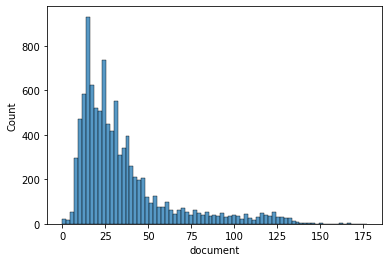

In [ ]:
sns.histplot(len_sentences)

### padding 적용

In [ ]:
x_train_padded = pad_sequences(x_train_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)
x_test_padded = pad_sequences(x_test_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

### 모델 생성

In [ ]:
embedding_dim = 25

In [ ]:
model = Sequential([
    # Embedding, LSTM, Dense, Dropout 등을 활용하여 자유롭게 모델링
    # 코드 입력
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    # Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

### 모델 요약

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 65, 25)            75000     
                                                                 
 bidirectional (Bidirectiona  (None, 64)               14848     
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 92,473
Trainable params: 92,473
Non-trainable params: 0
____________________________________________________

### 모델 컴파일

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
# 코드입력
model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['acc'])

### 체크포인트 생성

In [ ]:
checkpoint_path = 'my_checkpoint.ckpt'
checkpoint = ModelCheckpoint(checkpoint_path, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss',
                             verbose=1)

### 학습

In [ ]:
# 코드입력
model.fit(x_train_padded, y_train, 
          validation_data=(x_test_padded, y_test),
          callbacks=[checkpoint],
          epochs=10)

Epoch 1/10
246/250 [============================>.] - ETA: 0s - loss: 0.6929 - acc: 0.5180
Epoch 1: val_loss improved from inf to 0.69265, saving model to my_checkpoint.ckpt
250/250 [==============================] - 13s 13ms/step - loss: 0.6929 - acc: 0.5182 - val_loss: 0.6926 - val_acc: 0.5540
Epoch 2/10
244/250 [============================>.] - ETA: 0s - loss: 0.6919 - acc: 0.5666
Epoch 2: val_loss improved from 0.69265 to 0.69080, saving model to my_checkpoint.ckpt
250/250 [==============================] - 2s 9ms/step - loss: 0.6919 - acc: 0.5691 - val_loss: 0.6908 - val_acc: 0.6350
Epoch 3/10
246/250 [============================>.] - ETA: 0s - loss: 0.6859 - acc: 0.6817
Epoch 3: val_loss improved from 0.69080 to 0.67902, saving model to my_checkpoint.ckpt
250/250 [==============================] - 2s 9ms/step - loss: 0.6857 - acc: 0.6824 - val_loss: 0.6790 - val_acc: 0.6905
Epoch 4/10
245/250 [============================>.] - ETA: 0s - loss: 0.6421 - acc: 0.7323
Epoch 4: val_l

### 체크포인트 로드

In [ ]:
# 코드입력
model.load_weights(checkpoint_path)

## 모델 저장

In [ ]:
model.save('sample.h5')

## 모델 로드

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# 저장한 모델 불러오기
loaded_model = load_model('sample.h5')

## 실시간 예측기

In [ ]:
def run(loaded_model):
    user_input = input('댓글을 남겨주세요: ')
    sequence = tokenizer.texts_to_sequences([user_input])
    padded = pad_sequences(sequence, maxlen=max_length, truncating=trunc_type, padding=padding_type)
    pred = loaded_model.predict(padded)
    your_answer = pred.round().reshape(-1)
    result = '긍정 리뷰' if your_answer[0] > 0.5 else '부정 리뷰'
    print(result)

아래 셀을 실행하여 댓글을 남겨주세요

In [ ]:
a = np.arange(12).reshape(3, 4) 
a.reshape(-1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
run(loaded_model=model)

댓글을 남겨주세요: 인생 영화 ㅇ입니다. 정말 재밌어요
긍정 리뷰


In [ ]:
run(loaded_model=model)

댓글을 남겨주세요: 인생 영화다. 정말 끝내주는 영화
긍정 리뷰


In [ ]:
run(loaded_model=model)

댓글을 남겨주세요: 이 영화는 정말 재밌다. 강추!!!!!!!
긍정 리뷰


### 결과 예측 (예측 코드는 수정하지 않습니다)

In [ ]:
pred = model.predict(test_padded)
your_answer = pred.round().reshape(-1)
your_answer[:5]

array([1., 1., 1., 1., 0.], dtype=float32)

## 결과 제출

### 순서대로 평가가 진행됩니다. 실행은 1회만 해주세요.

- 느리다고 중지 후 다시 평가 코드를 실행하는 경우 제출 과정에서 패널티가 발생할 수 있습니다. (제출 횟수 이슈 발생 가능)

- 전체 점수는 [평가시스템](http://manage.jaen.kr)에서 확인할 수 있습니다.
    - 프로젝트 > 영화리뷰 감정 분석 > 리더보드 > 같은 반 리더보드

아래 Cell을 실행하여 예측 결과 업데이트

In [ ]:
# 예측 결과 업데이트
submission = pd.read_csv(os.path.join(DATA_DIR, project_name, 'submission.csv'))
submission['label'] = your_answer
display(submission)

# 제출
project.email = email
project.submit(submission)

,id,label
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,0.0
...,...,...
9995,9995,1.0
9996,9996,1.0
9997,9997,1.0
9998,9998,0.0


파일을 저장하였습니다. 파일명: submission-05-49-22.csv
제출 여부 :success
오늘 제출 횟수 : 1
제출 결과:0.7885
